In [6]:
from sklearn.datasets import load_diabetes

In [7]:
dataset = load_diabetes()

In [9]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [12]:
import pandas as pd
df_diabetes = pd.DataFrame(dataset.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [14]:
## Independent and Dependent Features
X = df_diabetes
y = dataset.target

In [33]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333


In [35]:
## Correlation Check
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


<Axes: >

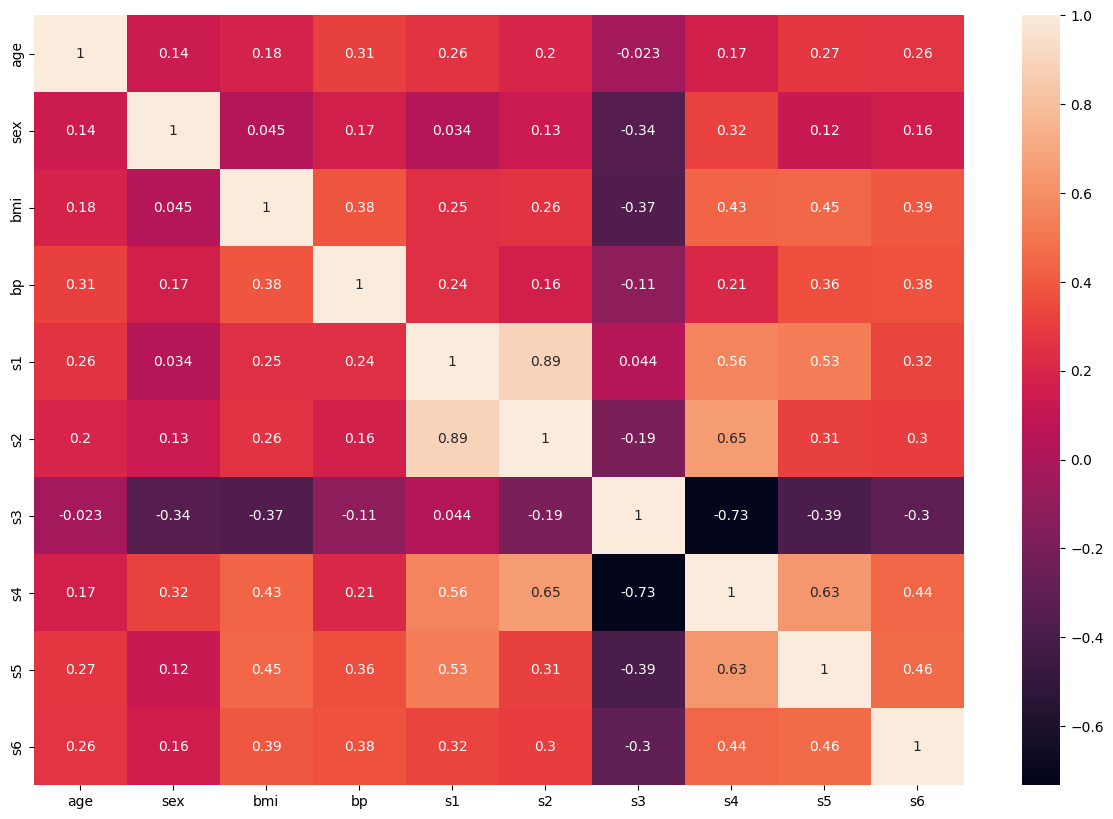

In [41]:
## Heatmap of Correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(X_train.corr(), annot=True)

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


## Hyperparameter Tunning

In [44]:
param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [45]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_split': [2, 4, 6, 8, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
regressor = DecisionTreeRegressor()

In [49]:
grid = GridSearchCV(estimator=regressor, param_grid=param, cv=5, scoring='neg_mean_squared_error')

In [51]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 4, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_split': [2, 4, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [52]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'splitter': 'random'}

In [53]:
## Predictions
y_pred=grid.predict(X_test)

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.14905393368487052
Mean Absolute Error:  55.033278428470354
Mean Squared Error:  4593.668754735252


In [56]:
selectmodel = DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features='sqrt', min_samples_split=6, splitter='random')
selectmodel.fit(X_train, y_train)

,criterion,'friedman_mse'
,splitter,'random'
,max_depth,6
,min_samples_split,6
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.47690217391304346, 0.9285714285714286, 's5 <= 0.013\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.22282608695652173, 0.7857142857142857, 's5 <= -0.049\nfriedman_mse = 4530.09\nsamples = 186\nvalue = 123.597'),
 Text(0.3498641304347826, 0.8571428571428572, 'True  '),
 Text(0.08695652173913043, 0.6428571428571429, 's5 <= -0.102\nfriedman_mse = 2196.986\nsamples = 43\nvalue = 92.884'),
 Text(0.06521739130434782, 0.5, 'friedman_mse = 0.0\nsamples = 1\nvalue = 201.0'),
 Text(0.10869565217391304, 0.5, 'sex <= 0.011\nfriedman_mse = 1964.357\nsamples = 42\nvalue = 90.31'),
 Text(0.043478260869565216, 0.35714285714285715, 's2 <= -0.081\nfriedman_mse = 2403.584\nsamples = 23\nvalue = 104.739'),
 Text(0.021739130434782608, 0.21428571428571427, 'friedman_mse = 308.222\nsamples = 3\nvalue = 119.333'),
 Text(0.06521739130434782, 0.21428571428571427, 's2 <= -0.009\nfriedman_mse = 2681.148\nsamples = 20\nvalue = 102.55'),
 Text(0.043478260869565216, 0.07142857142857142, '

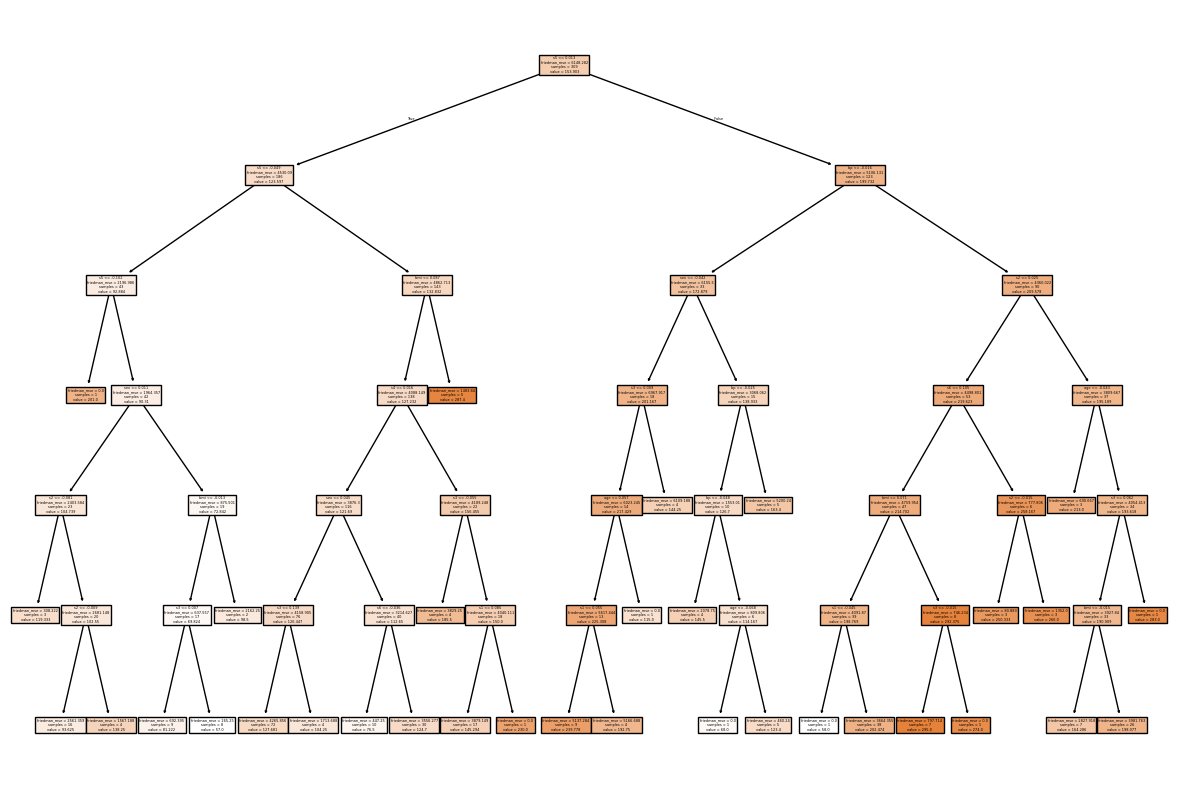

In [57]:
## Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(selectmodel, filled=True, feature_names=X.columns)